In [4]:
from PIL import Image
import matplotlib.pylab as plt
import numpy as np
from numpy import linalg as la

# Visualizzare immagine

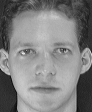

In [5]:
Image.open("s1/1.pgm") #apri immagine

# Immagine come una matrice di pixel

In [6]:
im = plt.imread("s1/1.pgm")#Leggi immagine come una matrice di pixel
im

array([[48, 49, 45, ..., 56, 56, 54],
       [45, 52, 39, ..., 52, 50, 51],
       [45, 50, 42, ..., 48, 53, 50],
       ...,
       [50, 48, 50, ..., 45, 46, 46],
       [45, 54, 49, ..., 46, 47, 47],
       [51, 51, 51, ..., 47, 46, 46]], dtype=uint8)

In [7]:
im.shape

(112, 92)

# Immagine vettorizzata

In [8]:
np.reshape(plt.imread(("s1/1.pgm")), (1,10304))

array([[48, 49, 45, ..., 47, 46, 46]], dtype=uint8)

# Matrice di immagini vettorizzate

In [9]:
matrix_immagini = np.zeros((280,10304)) #array con tutte le immagini (7 trainig, 3 test)
k = 0
for i in range(40):
    for j in range(7):
        matrix_immagini[k] = np.reshape(plt.imread(("s"+str(i+1)+'/'+str(j+1)+'.pgm')), (1,10304))
        k = k+1

In [10]:
matrix_immagini.shape

(280, 10304)

# Normalizzo

In [11]:
m=np.mean(matrix_immagini,axis=0)

In [12]:
matrix_immagini_m = matrix_immagini - m

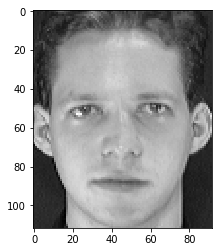

In [13]:
plt.imshow(np.reshape(matrix_immagini[0],(112,92)), cmap='gray') #Immagine normale

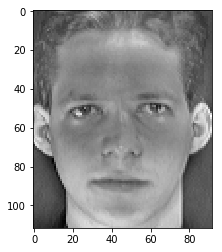

In [14]:
plt.imshow(np.reshape(matrix_immagini_m[0],(112,92)), cmap='gray') #Immagine normalizzata(ci concentriamo sulle cose essenziali)

### Io voglio un nuovo sistema di riferimento (PCA) che applicato alla matrice dei dati mi consente di avere la matrice di covarianza diagonalizzata (in questo modo avro' rappresentato i dati in nuovo sistema in cui ho eliminato il rumore e la ridondanza )

### PCA = SVD  tale sistema lo costruisco attraverso la svd, che mi restituisce le componenti principali che sono le stesse che ci permettono di diagonalizzare la matrice di covarianza costruita dalla relazione C = (X ' * X) / (n-1)

In [15]:
U, S, V = np.linalg.svd(matrix_immagini_m, full_matrices=False)

In [16]:
print("X:", matrix_immagini.shape)
print("U:", U.shape)
print("Sigma:", S.shape)
print("V^T:", V.shape)

X: (280, 10304)
U: (280, 280)
Sigma: (280,)
V^T: (280, 10304)


\begin{align}
\textit{I valori singolari sono legati agli autovalori della matrice di covarianza dalla seguente relazione }
\Lambda _i = s_i^2
\end{align}

Text(0,0.5,'Singular values')

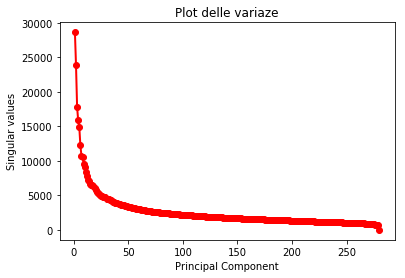

In [97]:
fig1 = plt.figure(figsize=(6,4))
sing_vals = np.arange(280) + 1
plt.plot(sing_vals, S, 'ro-', linewidth=2)
plt.title('Plot delle variaze')
plt.xlabel('Principal Component')
plt.ylabel('Singular values')


In [68]:
num_eigenfaces = 20

In [69]:
eigenfaces = np.zeros((num_eigenfaces,10304))
for i in range (num_eigenfaces):
    eigenfaces[i] = V[i]

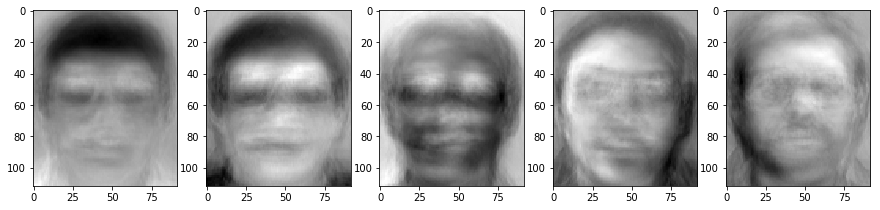

In [70]:
fig = plt.figure(figsize=(15,15))
for i in range (num_eigenfaces):
    plt.subplot(4,5,i+1)
    plt.imshow(np.reshape(eigenfaces[i],(112,92)), cmap='gray')

# Creazione basi per ogni istanza di test

In [71]:
pca_volti = np.zeros((280,num_eigenfaces))
for i in range(280):
    pca_volti[i] = np.dot(eigenfaces,matrix_immagini_m[i])#proiezione nel nuovo sistema di riferimento

# Nuova immagine singola

In [72]:
immagine_test = np.reshape(plt.imread(("s1/8.pgm")), (1,10304))

In [73]:
immagine_test

array([[44, 43, 32, ..., 43, 43, 37]], dtype=uint8)

In [74]:
immagine_test_m = immagine_test - m

In [75]:
immagine_test_m

array([[-41.41071429, -42.33928571, -53.65357143, ..., -31.75714286,
        -31.16785714, -36.35714286]])

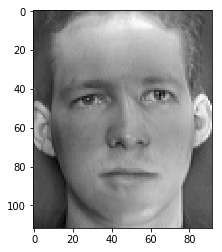

In [76]:
plt.imshow(np.reshape(immagine_test_m,(112,92)), cmap='gray')

In [77]:
pca_nuovo_volto = np.zeros((num_eigenfaces))
pca_nuovo_volto = np.dot(eigenfaces,np.transpose(immagine_test_m)) #proiezione nel nuovo sistema di riferimento

In [78]:
pca_nuovo_volto

array([[-2675.15747212],
       [  750.70451899],
       [-1335.42806604],
       [-1513.34149525],
       [ 1471.59612403]])

# Classificazione singola immagine

In [79]:
residui = np.zeros((280))#calcoliamo residui tra tutte le immagini di training proiettate nel nuovo sistema e la nuova immaggine, anch'essa proiettatta nel nuovo sistema
for i in range(280):
    residui[i] = np.linalg.norm(pca_volti[i] - np.transpose(pca_nuovo_volto), 2)

In [80]:
residui.argmin()

109

# Classificazione immaginio di test

In [33]:
test_matrix = np.zeros((120,10304))
k = 0
for i in range(40):
    for j in range(3):
        test_matrix[k] = np.reshape(plt.imread(("s"+str(i+1)+'/'+str(j+8)+'.pgm')), (1,10304))
        k = k+1

In [34]:
test_matrix_m = test_matrix - m

In [35]:
pca_nuovo_volto_matrix = np.zeros((120,num_eigenfaces))
for i in range(120):
    pca_nuovo_volto_matrix[i] = np.dot(test_matrix_m[i],np.transpose(eigenfaces)) #proiezione nel nuovo sistema di riferimento

In [36]:
residui_test = np.zeros((120,280))# calcolo residui per ogni immagine di test
for i in range(120):
    for j in range(280):
        residui_test[i,j] = np.linalg.norm(pca_volti[j] - np.transpose(pca_nuovo_volto_matrix[i]), 2)

In [37]:
residui_minimi = np.zeros((120))# classifico ogni immagine di test prendendo i residui minimi
for i in range(120):
    residui_minimi[i] = residui_test[i].argmin()

In [38]:
residui_minimi = residui_minimi.astype(int) #converto in interi l'indici dell'array dei residui minimi

In [39]:
max = 6 #verifico che le immagine di test sono state classificate bene 
min = 0
residui_corretti = 0
residui_sbagliati = []
for i in range(120):
    if(residui_minimi[i]>= min and residui_minimi[i]<=max):
        residui_corretti = residui_corretti + 1
    else:
        residui_sbagliati.append(i)
    if((i+1)%3 == 0):
        min = min + 7
        max = max + 7

In [40]:
(residui_corretti/120) *100

80.83333333333333

In [41]:
residui_sbagliati

[0,
 7,
 20,
 29,
 34,
 35,
 45,
 47,
 54,
 55,
 56,
 76,
 80,
 81,
 84,
 88,
 90,
 96,
 102,
 104,
 106,
 107,
 111]

In [42]:
k =1 # debugging
for i in range(120):
    print(str(k)+"  "+ str(i)+"  " + str(residui_minimi[i]))
    if((i+1)%3 == 0):
       print("--------------------------------")
       k = k+1

1  0  109
1  1  3
1  2  4
--------------------------------
2  3  9
2  4  12
2  5  13
--------------------------------
3  6  20
3  7  24
3  8  16
--------------------------------
4  9  23
4  10  22
4  11  25
--------------------------------
5  12  32
5  13  32
5  14  32
--------------------------------
6  15  40
6  16  38
6  17  41
--------------------------------
7  18  48
7  19  42
7  20  113
--------------------------------
8  21  53
8  22  51
8  23  51
--------------------------------
9  24  61
9  25  59
9  26  60
--------------------------------
10  27  67
10  28  63
10  29  19
--------------------------------
11  30  76
11  31  72
11  32  70
--------------------------------
12  33  77
12  34  19
12  35  19
--------------------------------
13  36  90
13  37  89
13  38  88
--------------------------------
14  39  97
14  40  96
14  41  96
--------------------------------
15  42  101
15  43  104
15  44  102
--------------------------------
16  45  222
16  46  107
16  47  250
---------

In [43]:
max = 6# debugging
min = 0
for i in range(40):
    print(str(i+1)+"  "+str(min) + "-" + str(max))
    max = max + 7
    min = min + 7

1  0-6
2  7-13
3  14-20
4  21-27
5  28-34
6  35-41
7  42-48
8  49-55
9  56-62
10  63-69
11  70-76
12  77-83
13  84-90
14  91-97
15  98-104
16  105-111
17  112-118
18  119-125
19  126-132
20  133-139
21  140-146
22  147-153
23  154-160
24  161-167
25  168-174
26  175-181
27  182-188
28  189-195
29  196-202
30  203-209
31  210-216
32  217-223
33  224-230
34  231-237
35  238-244
36  245-251
37  252-258
38  259-265
39  266-272
40  273-279


In [44]:
def set_trainig_set():
    matrix_immagini = np.zeros((280,10304)) #array con tutte le immagini (7 trainig, 3 test)
    k = 0
    for i in range(40):
        for j in range(7):
            matrix_immagini[k] = np.reshape(plt.imread(("s"+str(i+1)+'/'+str(j+1)+'.pgm')), (1,10304))
            k = k+1
    return matrix_immagini

In [45]:
def proiezione_trainig_set_pca(eigenfaces,numero_eigenfaces,matrix_immagini_m):
    pca_volti = np.zeros((280,numero_eigenfaces))
    for i in range(280):
        pca_volti[i] = np.dot(eigenfaces,matrix_immagini_m[i])#proiezione nel nuovo sistema di riferimento
    return pca_volti

In [46]:
def set_test_set():
    test_matrix = np.zeros((120,10304))
    k = 0
    for i in range(40):
        for j in range(3):
            test_matrix[k] = np.reshape(plt.imread(("s"+str(i+1)+'/'+str(j+8)+'.pgm')), (1,10304))
            k = k+1
    return test_matrix

In [47]:
def proiezione_test_set_pca(eigenfaces,num_eigenfaces,test_matrix):
    pca_nuovo_volto_matrix = np.zeros((120,num_eigenfaces))
    for i in range(120):
        pca_nuovo_volto_matrix[i] = np.dot(test_matrix_m[i],np.transpose(eigenfaces)) #proiezione nel nuovo sistema di riferimento
    return pca_nuovo_volto_matrix

In [82]:
def percentuale_classificazione(pca_volti,pca_nuovo_volto_matrix):
    residui_test = np.zeros((120,280))# calcolo residui per ogni immagine di test
    for i in range(120):
        for j in range(280):
            residui_test[i,j] = np.linalg.norm(pca_volti[j] - np.transpose(pca_nuovo_volto_matrix[i]), 2)
    residui_minimi = np.zeros((120))# classifico ogni immagine di test prendendo i residui minimi dei 280 per ogni immagine di test
    for i in range(120):
        residui_minimi[i] = residui_test[i].argmin()#argmin restituisce l'indice, in questo modo posso capire se l'immagine e' stata classificata correttamente
    residui_minimi = residui_minimi.astype(int)
    max = 6 #verifico che le immagine di test sono state classificate bene 
    min = 0
    residui_corretti = 0
    residui_sbagliati = []
    for i in range(120):
        if(residui_minimi[i]>= min and residui_minimi[i]<=max):
            residui_corretti = residui_corretti + 1
        else:
            residui_sbagliati.append(i)
        if((i+1)%3 == 0):
            min = min + 7
            max = max + 7
    return (residui_corretti/120) *100

# main

In [49]:
matrix_immagini = set_trainig_set()

In [50]:
m=np.mean(matrix_immagini,axis=0)
matrix_immagini_m = matrix_immagini - m

In [51]:
test_matrix = set_test_set()

In [52]:
test_matrix_m = test_matrix - m

In [53]:
U, S, V = np.linalg.svd(matrix_immagini_m, full_matrices=False)

In [93]:
percentuale_classificazione_vettore = np.zeros((280))
for i in range(1,281):
    eigenfaces = np.zeros((i,10304))
    
    for j in range (i):#carico tutti gli autovettori in base al valore di i(i-esima iterata di autovattori)
        eigenfaces[j] = V[j]
    pca_volti = proiezione_trainig_set_pca(eigenfaces,i,matrix_immagini_m)
    pca_nuovo_volto_matrix = proiezione_test_set_pca(eigenfaces,i,test_matrix_m)
    percentuale_classificazione_vettore[i-1] = percentuale_classificazione(pca_volti,pca_nuovo_volto_matrix)
    print("Eigenfaces= "+ str(i)+ "        percentuale classificazione= " + str(percentuale_classificazione_vettore[i-1]))
    

Eigenfaces= 1        percentuale classificazione= 13.333333333333334
Eigenfaces= 2        percentuale classificazione= 36.666666666666664
Eigenfaces= 3        percentuale classificazione= 59.166666666666664
Eigenfaces= 4        percentuale classificazione= 74.16666666666667
Eigenfaces= 5        percentuale classificazione= 80.83333333333333
Eigenfaces= 6        percentuale classificazione= 84.16666666666667
Eigenfaces= 7        percentuale classificazione= 90.0
Eigenfaces= 8        percentuale classificazione= 90.83333333333333
Eigenfaces= 9        percentuale classificazione= 94.16666666666667
Eigenfaces= 10        percentuale classificazione= 94.16666666666667
Eigenfaces= 11        percentuale classificazione= 93.33333333333333
Eigenfaces= 12        percentuale classificazione= 95.0
Eigenfaces= 13        percentuale classificazione= 95.0
Eigenfaces= 14        percentuale classificazione= 95.0
Eigenfaces= 15        percentuale classificazione= 95.0
Eigenfaces= 16        percentuale cl

Eigenfaces= 122        percentuale classificazione= 95.83333333333334
Eigenfaces= 123        percentuale classificazione= 95.83333333333334
Eigenfaces= 124        percentuale classificazione= 95.83333333333334
Eigenfaces= 125        percentuale classificazione= 95.83333333333334
Eigenfaces= 126        percentuale classificazione= 95.83333333333334
Eigenfaces= 127        percentuale classificazione= 95.83333333333334
Eigenfaces= 128        percentuale classificazione= 95.83333333333334
Eigenfaces= 129        percentuale classificazione= 95.83333333333334
Eigenfaces= 130        percentuale classificazione= 95.83333333333334
Eigenfaces= 131        percentuale classificazione= 95.83333333333334
Eigenfaces= 132        percentuale classificazione= 95.83333333333334
Eigenfaces= 133        percentuale classificazione= 95.0
Eigenfaces= 134        percentuale classificazione= 95.0
Eigenfaces= 135        percentuale classificazione= 95.0
Eigenfaces= 136        percentuale classificazione= 95.0
Ei

Eigenfaces= 264        percentuale classificazione= 95.0
Eigenfaces= 265        percentuale classificazione= 95.0
Eigenfaces= 266        percentuale classificazione= 95.0
Eigenfaces= 267        percentuale classificazione= 95.0
Eigenfaces= 268        percentuale classificazione= 95.0
Eigenfaces= 269        percentuale classificazione= 95.0
Eigenfaces= 270        percentuale classificazione= 95.0
Eigenfaces= 271        percentuale classificazione= 95.0
Eigenfaces= 272        percentuale classificazione= 95.0
Eigenfaces= 273        percentuale classificazione= 95.0
Eigenfaces= 274        percentuale classificazione= 95.0
Eigenfaces= 275        percentuale classificazione= 95.0
Eigenfaces= 276        percentuale classificazione= 95.0
Eigenfaces= 277        percentuale classificazione= 95.0
Eigenfaces= 278        percentuale classificazione= 95.0
Eigenfaces= 279        percentuale classificazione= 95.0
Eigenfaces= 280        percentuale classificazione= 95.0


Text(0,0.5,'percentuale classificazione')

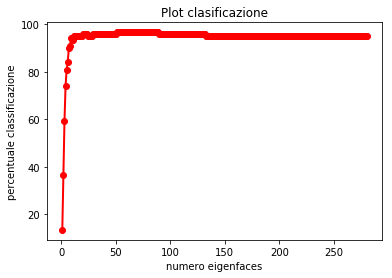

In [96]:
fig2 = plt.figure(figsize=(6,4))
eigenfaces_vals = np.arange(280) + 1
plt.plot(eigenfaces_vals, percentuale_classificazione_vettore, 'ro-', linewidth=2)
plt.title('Plot clasificazione')
plt.xlabel('numero eigenfaces')
plt.ylabel('percentuale classificazione')